### This project invloves DS (Data Science) & Machine Learning.

Here we are exploring, analysing, cleaning the data. Then, we are ready and setup to use machine learning algorithms and predict! We will also take advantage of machine learning predictions, by cleaning the data even more.

First off, we need to import all the needed modules/libraries that we are going to use for this project.

In [1]:
#### Analysing and Exploring ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visulization 
import seaborn as sns # Visulization 
import warnings
import os
import scipy
##### Pre-Processing
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
###### Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###### Deep Learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Here, we are making pandas (python library) read the data and we're storing it in a variable named "df" which stands for "dataframe".

In [2]:
df = pd.read_csv("datasets/flights.csv")

### Data Analysis/Exploring

Through this code, we can see the size of the data. It consists of 1048575 rows and 31 columns, which is incredibly good and reliable for machine learning.

In [3]:
print(df.shape)

(1048575, 31)


Well, to get started up and have an idea of what we will be working with. We can use this code that gives info about our dataset. Specifically, the columns and the entries.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

From, what I can see so far. We won't face problems with dealing with null values, since they are extremely low compared to the column's size. (To simplify things, we can calculate the null values from these insights, through subtracting the non-null count for the column's entries from the number of the total entries (1048575)).

I suppose that the main purpose of these columns, is to predict the delay reason. However, the delay reaosn column is not there yet. Which is something we need to take into account later on (we have to create it depending on the information from the other columns)

Now, to avoid the effort, we can use this code to precisely know the null values (which we need to keep in mind, when we get to the preprocessing step).

In [5]:
print(df.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64


What about the duplicates? Well, from the data type and the content, I have a feeling that there isn't much. But, we always might face inputting issues.

In [6]:
print(df.duplicated().sum())

0


There you go!

Now, what about getting to know some interesting insights specifically about the categorical columns? These entries, trully feed up my curiosity. Although, with a data as large as what we are using, it'll get more math dependant, which is something isn't focused on in this project and doesn't really help much, but it's better to keep this function in mind.

That's why we discuss the results. They won't help as much, in such datasets, but it's always good to have a look!

In [7]:
print(df.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1048575.0  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean      2015.0  1.694297e+00  1.382097e+01  3.953196e+00   2.256759e+03   
std          0.0  7.051508e-01  8.725656e+00  1.999436e+00   1.799166e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  1.000000e+00  6.000000e+00  2.000000e+00   7.550000e+02   
50%       2015.0  2.000000e+00  1.300000e+01  4.000000e+00   1.725000e+03   
75%       2015.0  2.000000e+00  2.100000e+01  6.000000e+00   3.485000e+03   
max       2015.0  3.000000e+00  3.100000e+01  7.000000e+00   9.794000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         1.048575e+06    1.009060e+06     1.009060e+06  1.008346e+06   
mean          1.322632e+03    1.333705e+03     1.133485e+01  1.665380e+01   
std           4.707748e+02    4.827415e+02     3.922372e+01  1.007006e+01  

Now, after having a look and keeping this in mind.

Do you remember, when I said the delay reason column  isn't there yet? It's actually the most important columns, we'll need. (y axis)

After, exploring the data. I have an idea of the strategy that we're going to be using, It'll grab information from these columns (CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY) 6, in total. We're seeking information from them to make a decision about the delay reason.

Strategy's code:

In [3]:
if 'delay_reason' not in df.columns:
    df['delay_reason'] = 'no delay'

for idx, i in enumerate(df["CANCELLATION_REASON"]):
    if i not in ["A", "B", "C", "D"]:
        delay_reasons = {}

        if pd.notna(df.at[idx, 'AIR_SYSTEM_DELAY']) and df.at[idx, 'AIR_SYSTEM_DELAY'] != 0:
            delay_reasons["AIR_SYSTEM_DELAY"] = df.at[idx, 'AIR_SYSTEM_DELAY']
        if pd.notna(df.at[idx, 'SECURITY_DELAY']) and df.at[idx, 'SECURITY_DELAY'] != 0:
            delay_reasons["SECURITY_DELAY"] = df.at[idx, 'SECURITY_DELAY']
        if pd.notna(df.at[idx, 'AIRLINE_DELAY']) and df.at[idx, 'AIRLINE_DELAY'] != 0:
            delay_reasons["AIRLINE_DELAY"] = df.at[idx, 'AIRLINE_DELAY']
        if pd.notna(df.at[idx, 'LATE_AIRCRAFT_DELAY']) and df.at[idx, 'LATE_AIRCRAFT_DELAY'] != 0:
            delay_reasons["LATE_AIRCRAFT_DELAY"] = df.at[idx, 'LATE_AIRCRAFT_DELAY']
        if pd.notna(df.at[idx, 'WEATHER_DELAY']) and df.at[idx, 'WEATHER_DELAY'] != 0:
            delay_reasons["WEATHER_DELAY"] = df.at[idx, 'WEATHER_DELAY']

        if delay_reasons:
            max_reason = max(delay_reasons, key=delay_reasons.get)
            df.at[idx, 'delay_reason'] = max_reason
        else:
            df.at[idx, 'delay_reason'] = 'no delay'


Strategy's explanation:

If any of the five columns I've mentioned (AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY) contain a value other than 0 or null, it indicates the reason for the delay. So, first, we check the CANCELLATION_REASON column. If its value matches one of the reasons listed, there is no delay since the flight was canceled and never took off. However, if the cancellation reason is not valid, we then check the five delay columns.

I've identified two potential issues. The first is that there may be multiple reasons for the delay. In this case, we'll take the most significant one (i.e., the highest value), which is the best approach when encoding entries for machine learning. Otherwise, having multiple values would cause the machine learning model to fail.

The second issue, which we haven't yet resolved, is that sometimes none of the five columns will have a value, leading it to be registered as "no delay." However, when we check the ARRIVAL_DELAY column, there may still be a delay. We can add validation to check for this, but even after the validation, we can't take any further direct action.

The solution I'm planning to integrate is as follows: if the cell is marked "no delay" but there is an arrival delay, we'll delete the row, saving the index and row data in a separate DataFrame. After determining the model with the highest accuracy, we'll use it to predict the delay reason and then reinsert the deleted row at its original index.

Further more, there is something we also need to keep in mind. Usually, there are unecessary columns we won't need and are useless/meaningless. In such cases, we drop them. As followed:

In [4]:
columns_to_drop = [
    "FLIGHT_NUMBER", "TAIL_NUMBER", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", 
    "TAXI_IN", "DIVERTED", "CANCELLED", "CANCELLATION_REASON", 
    "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", 
    "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"
]

df = df.drop(columns=columns_to_drop)

Should function properly, let's check!

In [7]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

Sucess..!

There is something I'd like to do, it's not useful for the machine learning. However, for insights sake. It is, indeed.

I want to replace the "DAY_OF_WEEK" column's entries with the actual day of the week. 

Although you might wonder, the days of the week are not always fixed and can vary depending on culture and other factors. I was able to determine the count by referencing a specific date in the dataset and cross-checking it with the calendar. It turned out to be a Thursday, and the day of the week was listed as the 4th. Using this simple logic, I was able to mark down the count. However, we'll revert this change later on, since the machine learning does not accept "Categorical values".

In [8]:
day_mapping = {
    1: "Mon", 2: "Tues", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat", 7: "Sun"
}

df["DAY_OF_WEEK"].replace(day_mapping, inplace=True)

Now, let's make sure everything's alright.

In [9]:
df["DAY_OF_WEEK"].value_counts()

DAY_OF_WEEK
Fri     163070
Mon     162041
Thur    159800
Sun     148678
Tues    144193
Wed     141753
Sat     129040
Name: count, dtype: int64

Yessir!

For the final exploration and analysis step, we will use charts to visually represent our data and the insights we've gathered. The relationships explored stem from my own curiosity. Everything is clearly explained through the legends, labels, titles, and other annotations on the charts.

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\352221453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="delay_reason", data=df, palette="coolwarm")


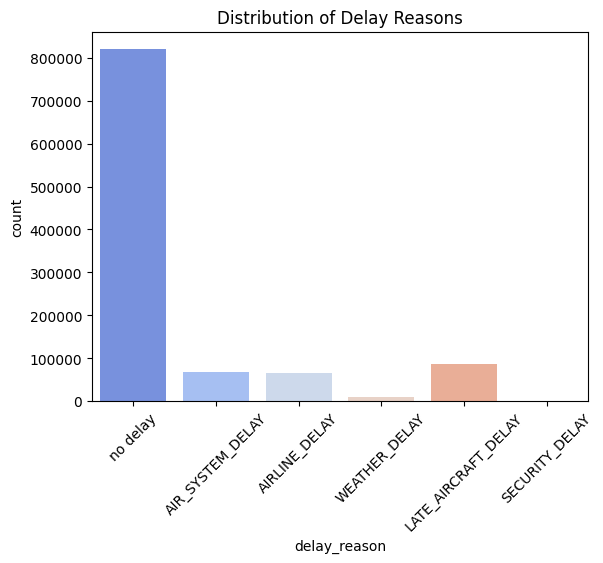

In [13]:
sns.countplot(x="delay_reason", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Delay Reasons")
plt.show()

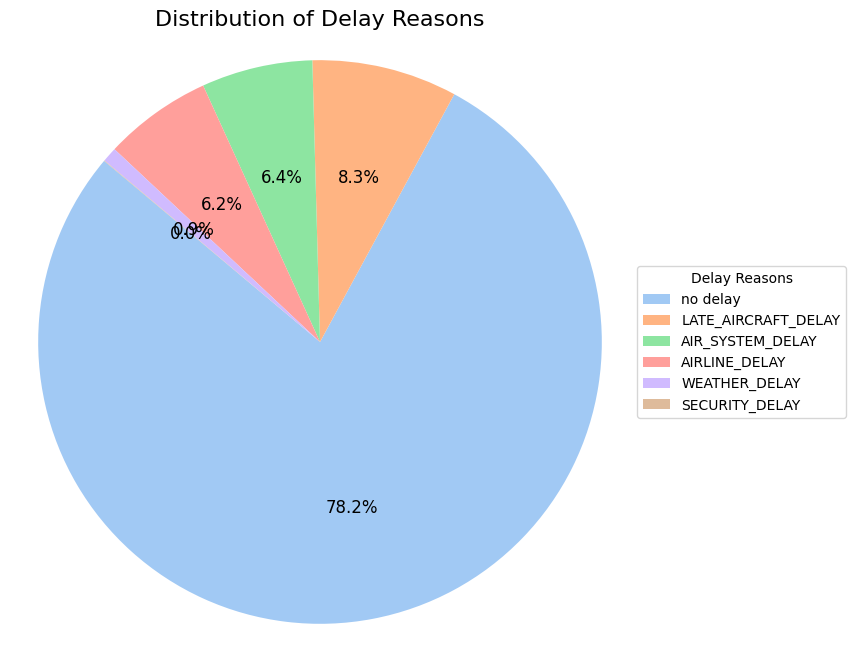

In [14]:
plt.figure(figsize=(8, 8))

delay_counts = df['delay_reason'].value_counts()

wedges, texts, autotexts = plt.pie(delay_counts,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("pastel"),textprops={'fontsize': 12})

plt.legend(wedges, delay_counts.index, title="Delay Reasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Delay Reasons", fontsize=16)
plt.axis('equal')

plt.show()

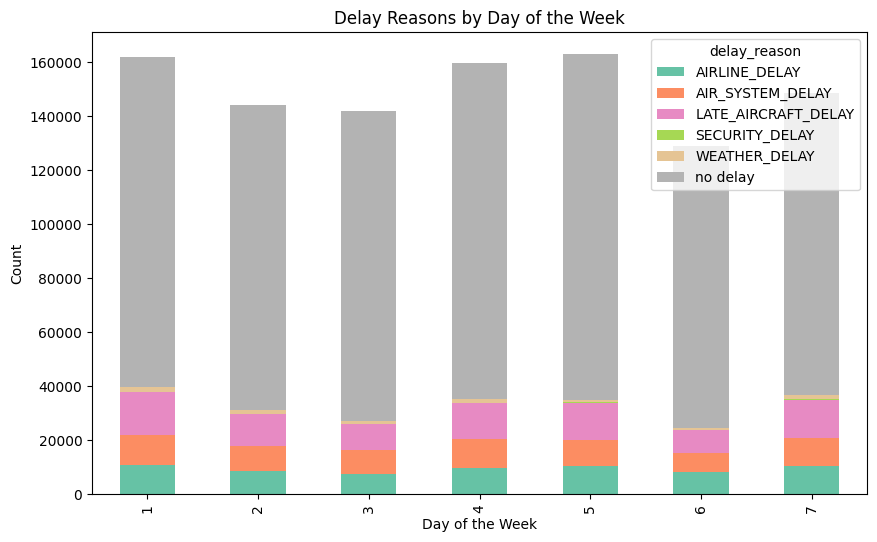

In [15]:
pd.crosstab(df['DAY_OF_WEEK'], df['delay_reason']).plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Delay Reasons by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\2843958254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="delay_reason", y="ARRIVAL_DELAY", data=df, palette="viridis")


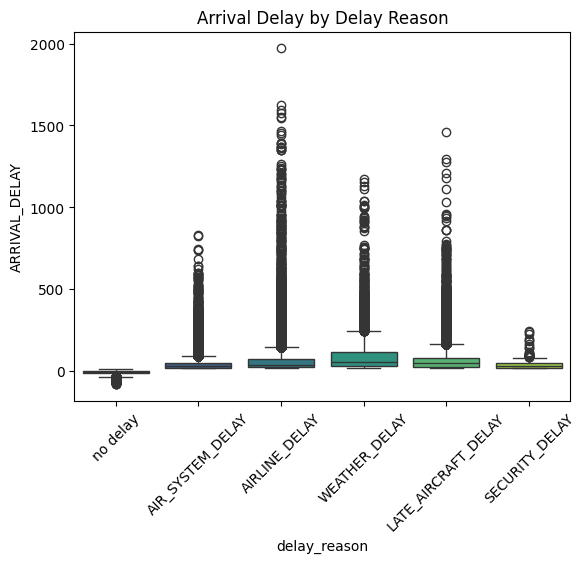

In [16]:
sns.boxplot(x="delay_reason", y="ARRIVAL_DELAY", data=df, palette="viridis")
plt.title("Arrival Delay by Delay Reason")
plt.xticks(rotation=45)
plt.show()

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\2244285858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="delay_reason", y="ARRIVAL_DELAY", data=df, palette="muted")


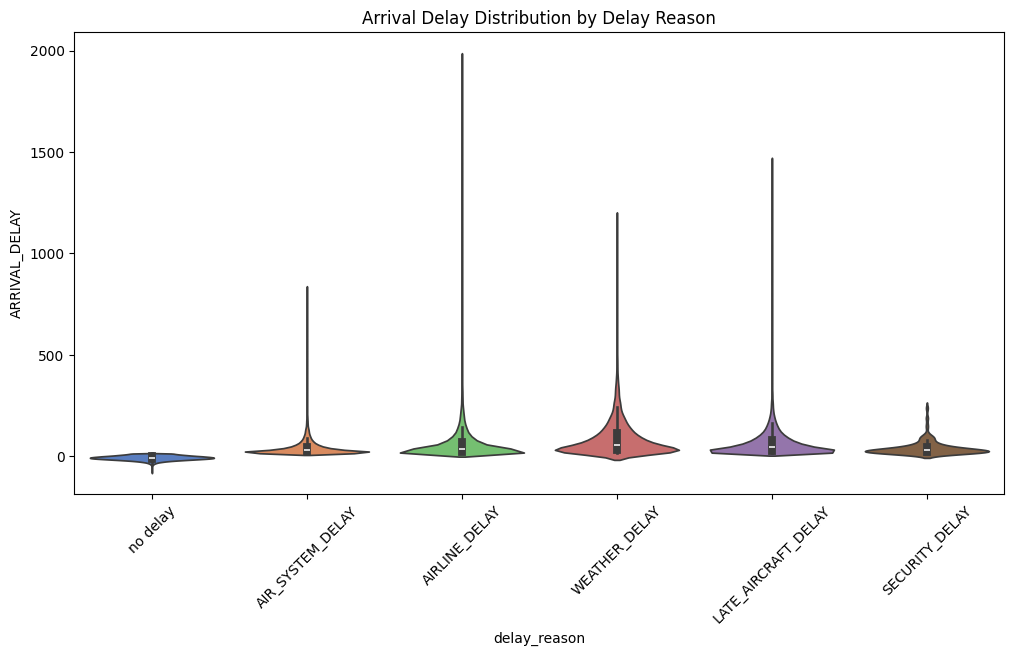

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="delay_reason", y="ARRIVAL_DELAY", data=df, palette="muted")
plt.title("Arrival Delay Distribution by Delay Reason")
plt.xticks(rotation=45)
plt.show()

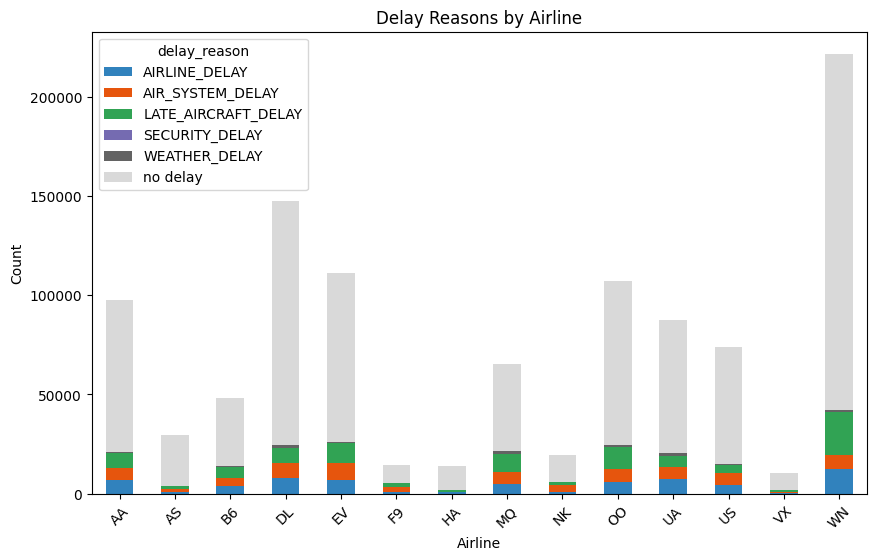

In [18]:
pd.crosstab(df['AIRLINE'], df['delay_reason']).plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title("Delay Reasons by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

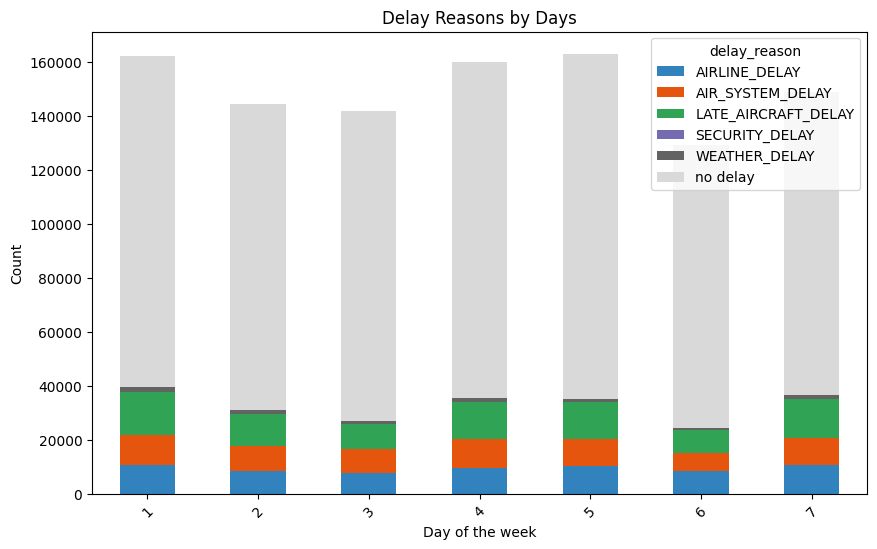

In [19]:
pd.crosstab(df['DAY_OF_WEEK'], df['delay_reason']).plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title("Delay Reasons by Days")
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\2335773684.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="delay_reason", y="DEPARTURE_DELAY", data=df, palette="muted")


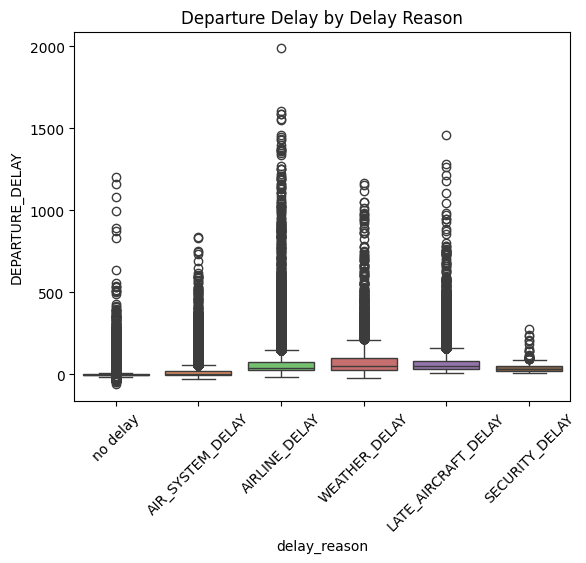

In [20]:
sns.boxplot(x="delay_reason", y="DEPARTURE_DELAY", data=df, palette="muted")
plt.title("Departure Delay by Delay Reason")
plt.xticks(rotation=45)
plt.show()


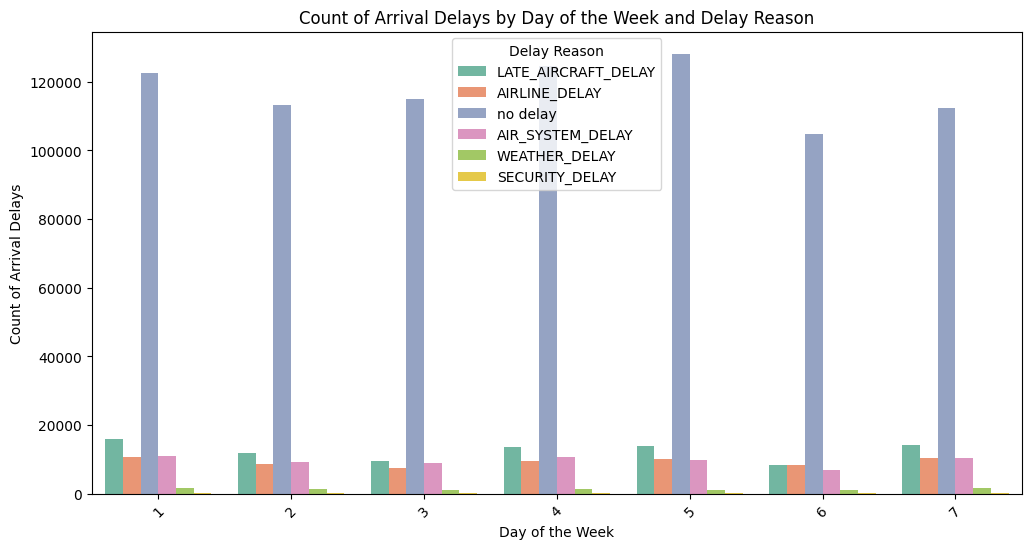

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DAY_OF_WEEK', hue='delay_reason', palette='Set2')
plt.title("Count of Arrival Delays by Day of the Week and Delay Reason")
plt.xlabel("Day of the Week")
plt.ylabel("Count of Arrival Delays")
plt.xticks(rotation=45)
plt.legend(title='Delay Reason')
plt.show()


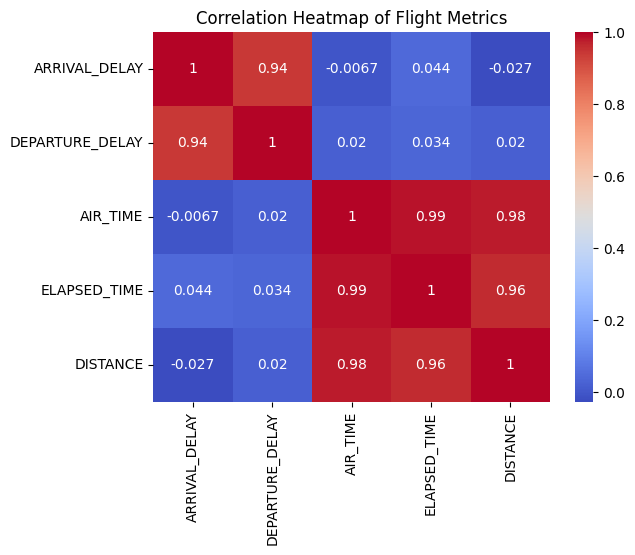

In [22]:
sns.heatmap(df[['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'AIR_TIME', 'ELAPSED_TIME', 'DISTANCE']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Flight Metrics")
plt.show()

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\3371961900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="delay_reason", y="DISTANCE", data=df, palette="rocket")


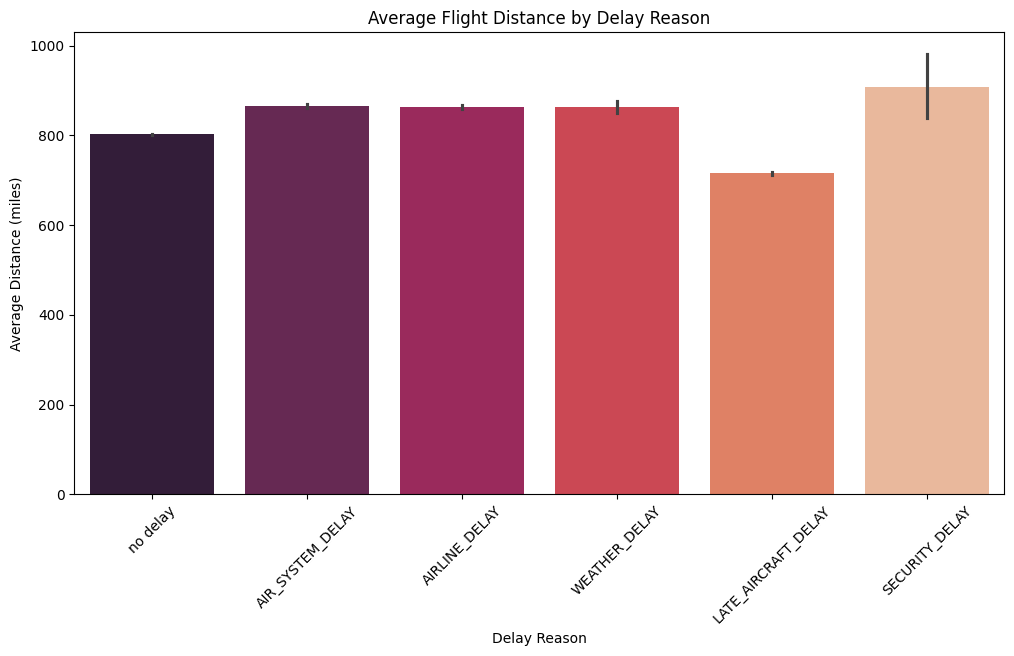

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x="delay_reason", y="DISTANCE", data=df, palette="rocket")
plt.title("Average Flight Distance by Delay Reason")
plt.xlabel("Delay Reason")
plt.ylabel("Average Distance (miles)")
plt.xticks(rotation=45)
plt.show()

c:\Users\htami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\htami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\htami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\htami\AppData\Local\Programs\Python\Python311\

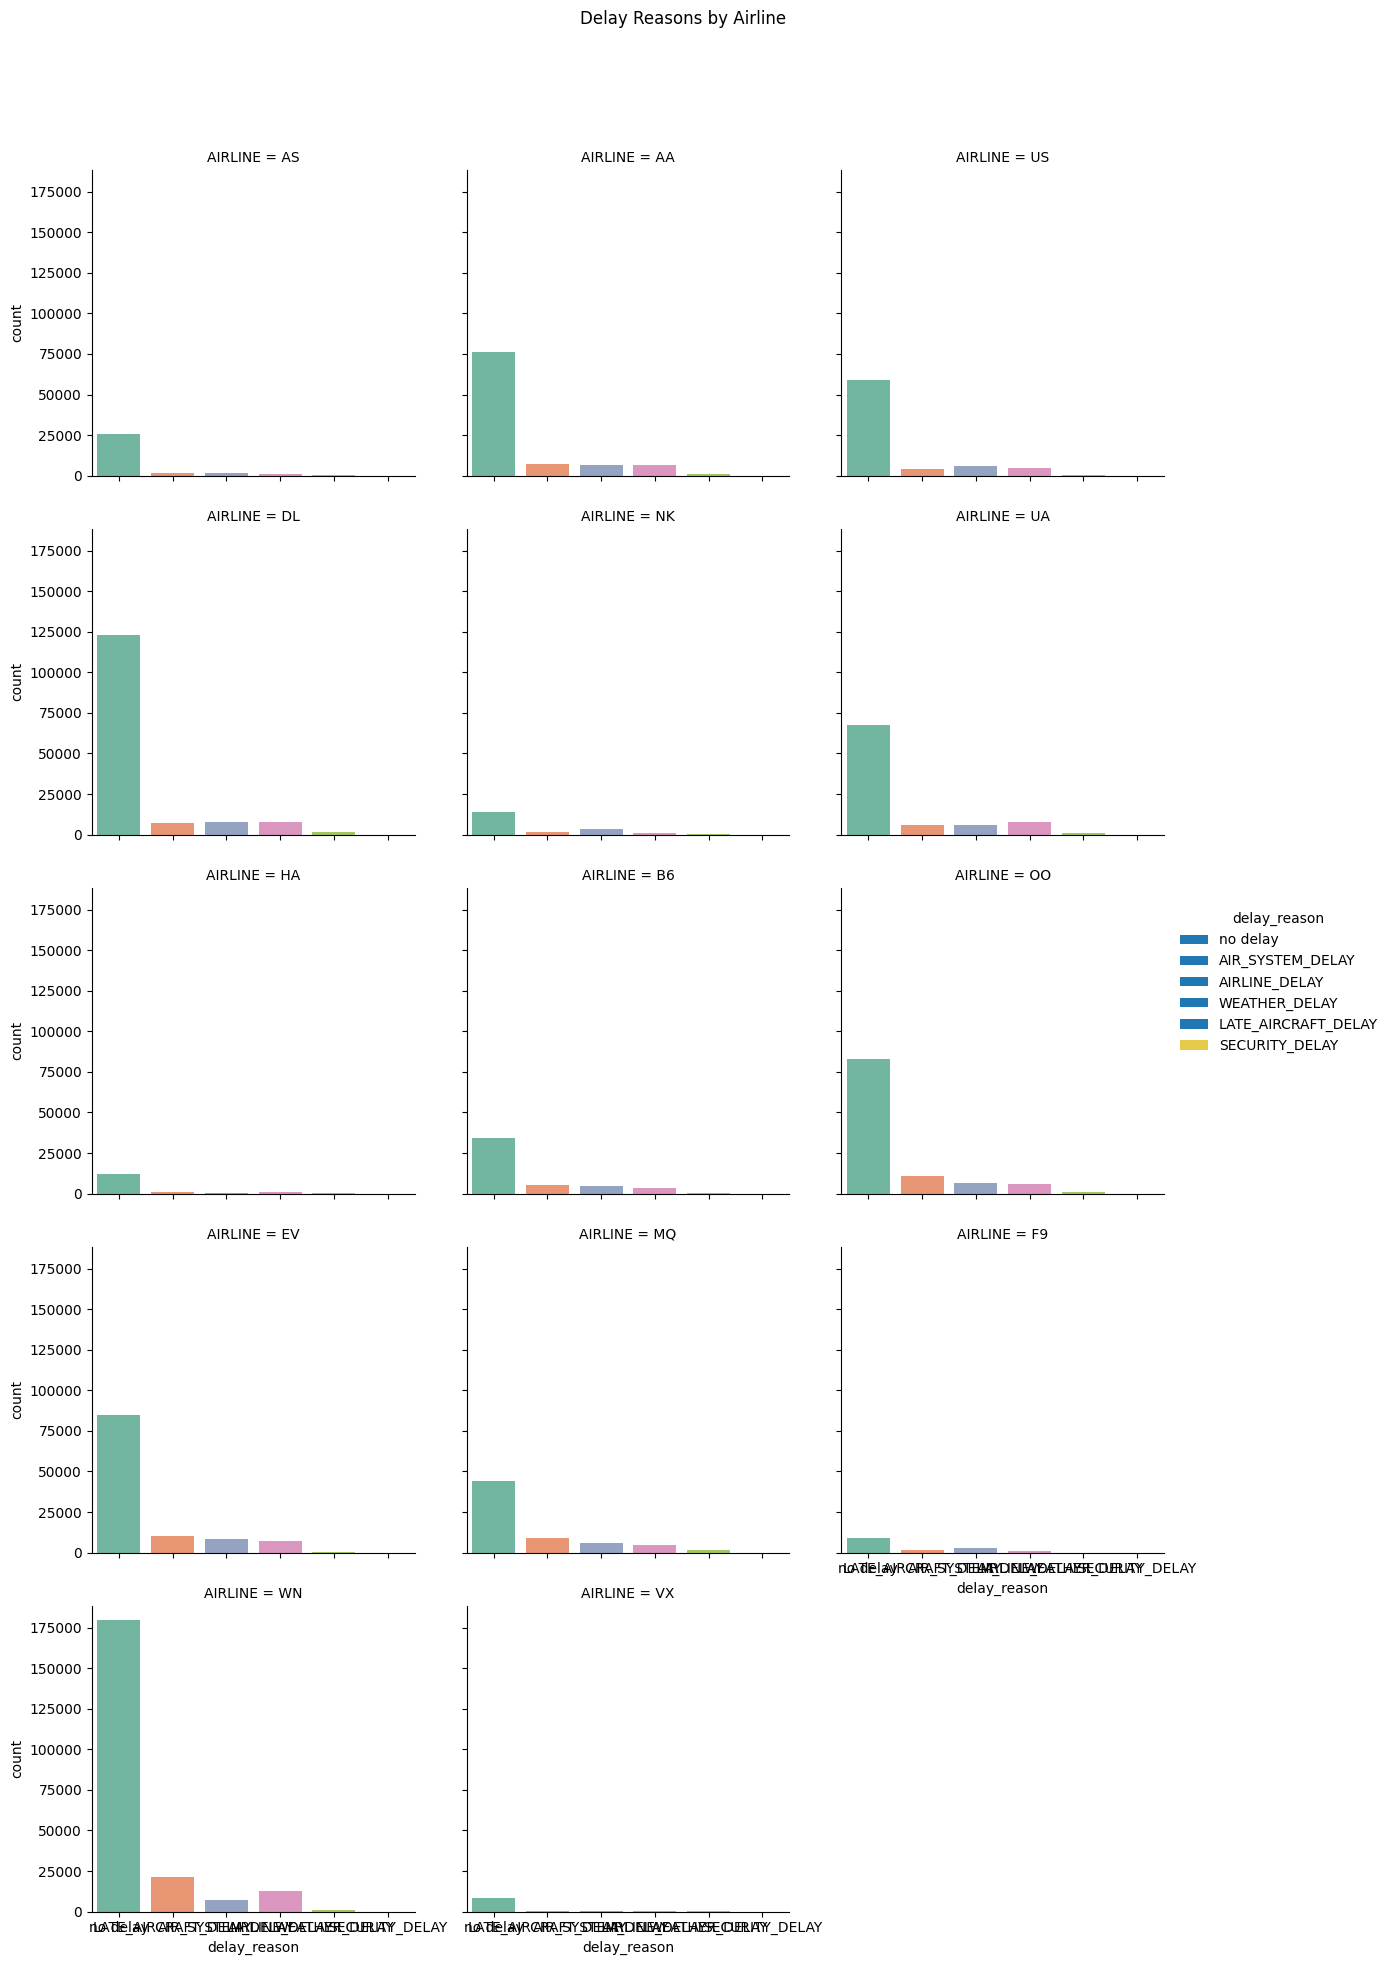

In [24]:
g = sns.FacetGrid(df, col="AIRLINE", hue="delay_reason", col_wrap=3, height=4)
g.map(sns.countplot, "delay_reason", order=df['delay_reason'].value_counts().index, palette="Set2")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Delay Reasons by Airline')
plt.show()

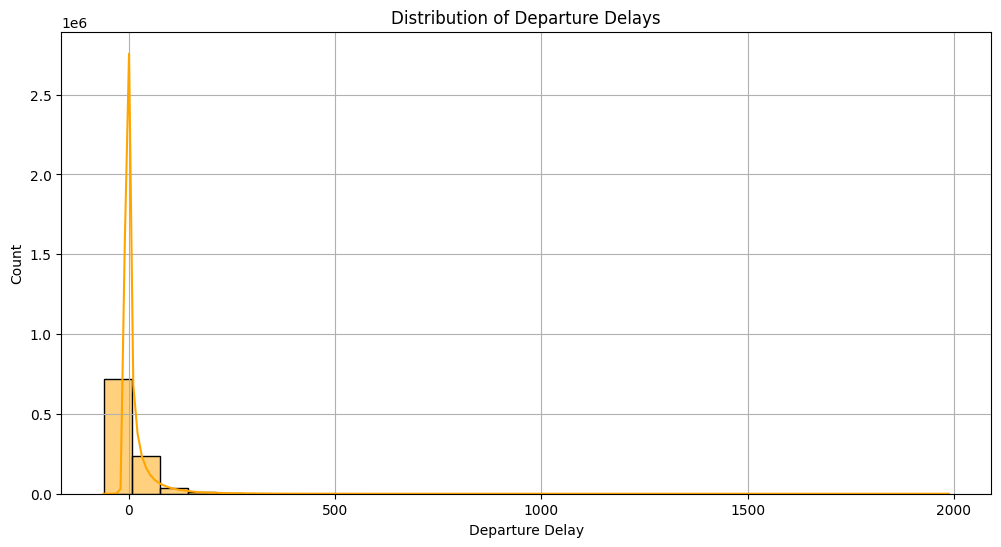

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['DEPARTURE_DELAY'], bins=30, kde=True, color='orange')
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay")
plt.grid()
plt.show()

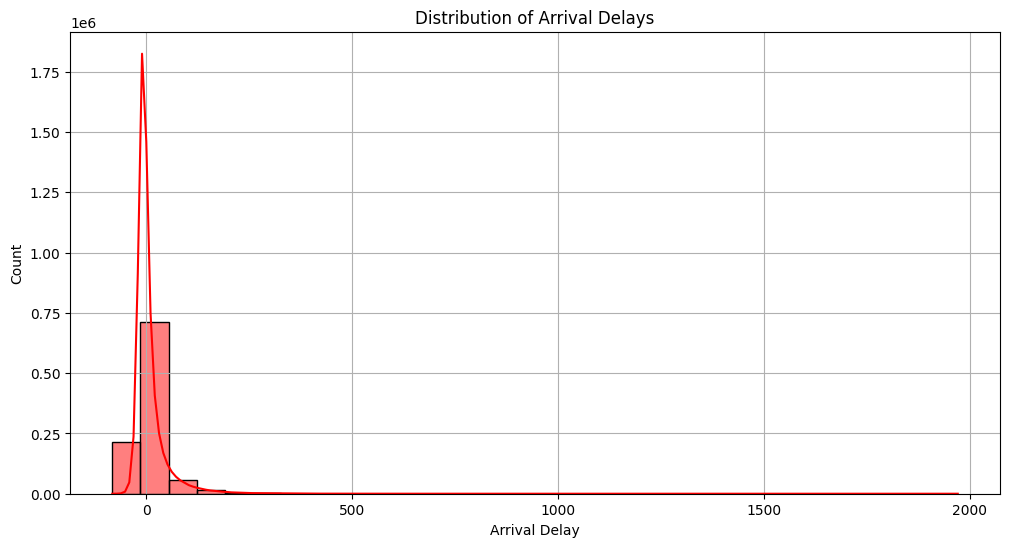

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ARRIVAL_DELAY'], bins=30, kde=True, color='red')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay")
plt.grid()
plt.show()

C:\Users\htami\AppData\Local\Temp\ipykernel_12092\3613807519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='delay_reason', ax=axs[0], order=df['delay_reason'].value_counts().index, palette='Blues')
C:\Users\htami\AppData\Local\Temp\ipykernel_12092\3613807519.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_by_airline, x='DEPARTURE_DELAY', y='AIRLINE', ax=axs[1], palette='viridis')


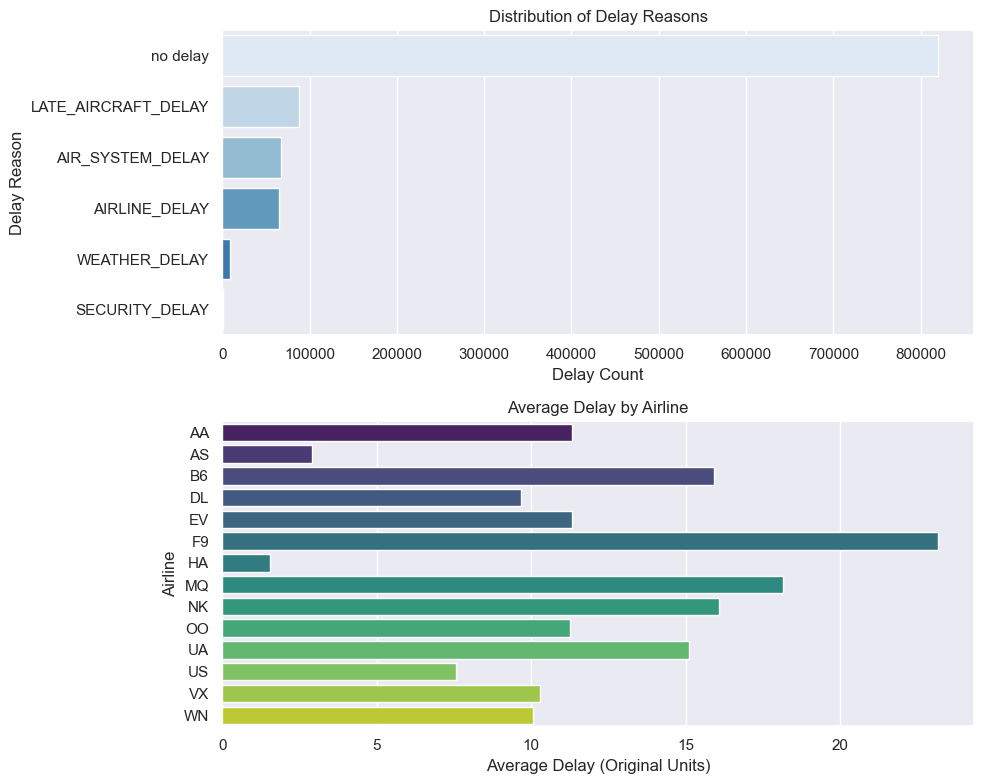

In [27]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 1. Distribution of Delay Reasons
sns.countplot(data=df, y='delay_reason', ax=axs[0], order=df['delay_reason'].value_counts().index, palette='Blues')
axs[0].set_title('Distribution of Delay Reasons')
axs[0].set_xlabel('Delay Count')
axs[0].set_ylabel('Delay Reason')

# 2. Average Delay by Airline
avg_delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().reset_index()
sns.barplot(data=avg_delay_by_airline, x='DEPARTURE_DELAY', y='AIRLINE', ax=axs[1], palette='viridis')
axs[1].set_title('Average Delay by Airline')
axs[1].set_xlabel('Average Delay (Original Units)')
axs[1].set_ylabel('Airline')

plt.tight_layout()
plt.show()



### Pre-processing

Now, let's start with preprocessing and preparing our data (features).

Let's get a quick rewind of what the null values were.

In [28]:
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         39515
DEPARTURE_DELAY        39515
SCHEDULED_TIME             2
ELAPSED_TIME           43071
AIR_TIME               43071
DISTANCE                   0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           41296
ARRIVAL_DELAY          43071
delay_reason               0
dtype: int64

Since all the null values are numerical, we will be dealing with them through the mean (average values). This is the most used and one of the best methods for our case.

In [5]:
### dealing with numerical null vlaues:

df["DEPARTURE_TIME"].fillna(df["DEPARTURE_TIME"].mean(), inplace=True)
df["DEPARTURE_DELAY"].fillna(df["DEPARTURE_DELAY"].mean(), inplace=True)
df["SCHEDULED_TIME"].fillna(df["SCHEDULED_TIME"].mean(), inplace=True)
df["ELAPSED_TIME"].fillna(df["ELAPSED_TIME"].mean(), inplace=True)
df["AIR_TIME"].fillna(df["AIR_TIME"].mean(), inplace=True)
df["ARRIVAL_TIME"].fillna(df["ARRIVAL_TIME"].mean(), inplace=True)
df["ARRIVAL_DELAY"].fillna(df["ARRIVAL_DELAY"].mean(), inplace=True)

That should work, let's check!

In [30]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
delay_reason           0
dtype: int64

As we've seen, there are no duplicates, so we won't need to address any problem related to duplicates.

Now, we need to encode the categorical values to ensure machine learning models functions properly.

In [6]:
### Encoding


encoders = {}

for column in ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "delay_reason"]:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])  
    encoders[column] = encoder  


Should work, we'll check everything at once when we're done.

Now, scaling. we need to scale the data so there isn't that much gaps between numerical values (these gaps are usually caused by outliers).

In [7]:
### Scaling

### Columns that need to be scaled are:

columns_to_scale = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 
                    'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 
                    'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
                    'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 
                    'ARRIVAL_DELAY']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

Should work as well.

In [35]:
### Reverting a change so the data could fity in a machine learning model:

day_mapping = {
 "Mon": 1, "Tues": 2, "Wed": 3, "Thur": 4, "Fri": 5, "Sat": 6, "Sun": 7
 }

df["DAY_OF_WEEK"].replace(day_mapping, inplace=True)


As I mentioned before, we need to revert this change, in order for our maching learning models to function properly.

Let's have a final look at our data information, to make sure nothing went wrong.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  int32  
 5   ORIGIN_AIRPORT       1048575 non-null  int32  
 6   DESTINATION_AIRPORT  1048575 non-null  int32  
 7   SCHEDULED_DEPARTURE  1048575 non-null  float64
 8   DEPARTURE_TIME       1048575 non-null  float64
 9   DEPARTURE_DELAY      1048575 non-null  float64
 10  SCHEDULED_TIME       1048575 non-null  float64
 11  ELAPSED_TIME         1048575 non-null  float64
 12  AIR_TIME             1048575 non-null  float64
 13  DISTANCE             1048575 non-null  float64
 14  SCHEDULED_ARRIVAL    1048575 non-null  float64
 15

Yup, we're all set.

As I mentioned, we need to ensure that our preprocessing steps were executed smoothly and successfully. We can verify this by reviewing the first 20 rows of the dataset.

In [10]:
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,Thur,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0
1,2015,1,1,Thur,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0
2,2015,1,1,Thur,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0
3,2015,1,1,Thur,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0
4,2015,1,1,Thur,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0
5,2015,1,1,Thur,DL,SFO,MSP,25,20.0,-5.0,217.0,230.0,206.0,1589,602,610.0,8.0
6,2015,1,1,Thur,NK,LAS,MSP,25,19.0,-6.0,181.0,170.0,154.0,1299,526,509.0,-17.0
7,2015,1,1,Thur,US,LAX,CLT,30,44.0,14.0,273.0,249.0,228.0,2125,803,753.0,-10.0
8,2015,1,1,Thur,AA,SFO,DFW,30,19.0,-11.0,195.0,193.0,173.0,1464,545,532.0,-13.0
9,2015,1,1,Thur,DL,LAS,ATL,30,33.0,3.0,221.0,203.0,186.0,1747,711,656.0,-15.0


There you go!

Alright, now we need to set up our x and y axis for the machine learning.

As I already mentioned, from the very beginning, our y axis is going to be the delay reason (output). Thus, all of the other columns are our x axis (features, inputs). 

We can assign them through this code.

In [8]:
x = df.iloc[:, :-1]
y = df["delay_reason"]

Now, we need to split our features (X) and target labels (y) by performing a train-test split. This is a crucial step to ensure that our machine learning model is trained on a subset of the data and tested on another to evaluate its performance. Typically, we divide the data into training and testing sets, with a common split ratio being 80% for training and 10-20% for testing. 

In [9]:
### train test split:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

Let's quickly check the shape/size of our training and testing sets to ensure everything is running smoothly

In [21]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(943717, 17) (104858, 17) (943717,) (104858,)


Great!

### Machine Learning

Now, as what most people say. THE REAL FUN BEGINS!


Here’s the enhanced version of your text, formatted with a proper list using Markdown:

The output we are predicting (y-axis) is categorical, meaning it belongs to specific classes. Therefore, we need to use models that are designed for classification tasks. The best models for this purpose, and the ones we will be using, are:

- Logistic Regression
- SVC (Support Vector Classifier)
- DTC (Decision Tree Classifier)
- RF (Random Forest)

First, let's start with logistic regression. I anticipate that the accuracy may not be very high, as this algorithm is primarily designed for binary classification (0/1 or True/False). However, in this case, we are dealing with multiclass outputs.

In [41]:
### LogistecRegression

alg_1=LogisticRegression()

alg_1.fit(x_train,y_train)

y_pred=alg_1.predict(x_test)


acc_alg1=accuracy_score(y_pred, y_test)

acc_alg1

c:\Users\htami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7809895286959507

Yup. Though, let's keep in mind this accuracy.

Secondly, let's try the Support Vector Classifier (SVC). There are two dedicated kernels we can use: one is the Radial Basis Function (RBF) kernel, and the other is the linear kernel.

The SVC works by finding the best dividing line that separates the classes in the feature space. Given that our data pertains to airplanes, I predict that the RBF kernel may perform better due to its ability to handle complex, non-linear relationships. However, we should try both kernels to compare their performance and determine which one yields the best results.

In [ ]:
### SVC (SupportVectorClassifier)

svs_2=SVC(kernel="rbf")

svs_2.fit(x_train,y_train)

y_pred=svs_2.predict(x_test)

acc_svc_2=accuracy_score(y_pred, y_test)

acc_svc_2

In [ ]:
### SVC (SupportVectorClassification)

svs_2=SVC(kernel="linear")

svs_2.fit(x_train,y_train)

y_pred=svs_2.predict(x_test)

acc_svc_2=accuracy_score(y_pred, y_test)

acc_svc_2

There you go! Keep in mind those accuracies as well.

Thirdly, let's go for the Decision Tree Classifier. It simply works by splitting the data into branches based on feature values to create a tree-like model for decision-making. I have set the maximum depth of the tree to 100 to prevent overfitting. I assume that both the Decision Tree Classifier and the Random Forest algorithm will yield the best results in terms of accuracy.

In [ ]:
### DTC (DecisionTreeClassifier)

DT=DecisionTreeClassifier(max_depth=100)

DT.fit(x_train,y_train)

y_pred=DT.predict(x_test)

acc_DT=accuracy_score(y_pred, y_test)

acc_DT

Heeray! Keep in mind this accuracy too.

Last but not least, we have the Random Forest algorithm. It consists of multiple random decision trees in a "forest," which takes the mode (most common/frequent) answer among those trees to make predictions. I’ve set the number of estimators (n_estimators) to 3000, which means the model will use 3000 decision trees for making predictions, and the maximum depth is set to 100, which helps prevent overfitting and highers the results we can get (the accuracy score).

In [10]:
### RF (RandomForest (RandomdecisionTrees))

RF=RandomForestClassifier(n_estimators=3000, max_depth=100)

RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)

acc_RF=accuracy_score(y_pred, y_test)

acc_RF

0.9348356825421046

Awesome!

I told you to keep in mind the accuracies we obtained so far to determine which algorithm yields the best results or prediction scores. It turns out that the Random Forest Classifier algorithm achieved an accuracy of about 93-94%.

Knowing which model yields the best prediction score is vital, as we will be using it to solve the delay reasons problem I mentioned at the very beginning. To recap, the issue was that our strategy for creating the y-axis column (delay reason) had a flaw: the cell entry indicated "no delay," even though there was an arrival delay in the arrival delay column. The solution I was planning and still is planning to integrate is as follows: if the cell is marked "no delay," but there is an arrival delay, we'll delete the row and save the index and row data in a separate DataFrame. After determining the model with the highest accuracy, we'll use it to predict the delay reason and then reinsert the deleted row at its original index.

here is also another problem I anticipate: the model might predict "no delay," even though we are confident that there is a delay. In that case, we will go with the most realistic and convenient solution, which is to take the mode (most frequent) delay reason and replace it with the model's prediction.

The code is as follows:

In [11]:
### Prediction

prediction_df = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
    if row['delay_reason'] == 'no delay' and row['ARRIVAL_DELAY'] > 0:
        prediction_df = prediction_df.append(row)
        df.drop(index, inplace=True)

if not prediction_df.empty:
    X_prediction = prediction_df[['ARRIVAL_DELAY']]
    
    predicted_codes = RF.predict(X_prediction)
    
    predicted_delay_reasons = pd.Series(predicted_codes).map(df['delay_reason'].cat.categories)

    mode_value = predicted_delay_reasons[predicted_delay_reasons != 'no delay'].mode()[0]

    predicted_delay_reasons = predicted_delay_reasons.replace('no delay', mode_value)

    prediction_df['delay_reason'] = predicted_delay_reasons

    for index in prediction_df.index:
        df.loc[index] = prediction_df.loc[index]

Original DataFrame after deletion:
         YEAR  MONTH  DAY  DAY_OF_WEEK  AIRLINE  ORIGIN_AIRPORT  \
0        2015      1    1            4        1              15   
1        2015      1    1            4        0             171   
2        2015      1    1            4       11             272   
3        2015      1    1            4        0             171   
4        2015      1    1            4        1             271   
...       ...    ...  ...          ...      ...             ...   
1048570  2015      3   10            2        4             251   
1048571  2015      3   10            2       10             177   
1048572  2015      3   10            2       10             262   
1048573  2015      3   10            2        4             212   
1048574  2015      3   10            2        7              59   

         DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0                        271            -2.798859    2.154530e+00   
1                     

There you go!

To wrap things up and ensure everything is organized, let's convert the DataFrame into a CSV file and reverse any scaling or encoding if necessary!

In [20]:
### If reversing thge scaling or encoding is needed, we can easily use the .inverse_transform() function.

### Let's remap the "day of the week" column again to make it clearer and provide better insights.

day_mapping = {
    1: "Mon", 2: "Tues", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat", 7: "Sun"
}

df["DAY_OF_WEEK"].replace(day_mapping, inplace=True)

### Finally, let's export our cleaned DataFrame to a CSV file!

file_path = "datasets/flights_cleaned.csv"

if not os.path.exists(file_path):
 df.to_csv("datasets/flights_cleaned.csv")

KeyboardInterrupt: 

Now, we have completely finished the project. We successfully cleaned the data, applied various machine learning models, and identified the best-performing one for predicting delay reasons.